## Observations and Insights 

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
#study_results = pd.read_csv(study_results_path)

mouse_metadata
#study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
#Read in mouse data 

mouse_metadata = pd.read_csv(mouse_metadata_path)
#mouse_metadata.head()

In [3]:
#Read in study results

study_results = pd.read_csv(study_results_path)
#study_results.head()

In [4]:
#used the .merge function to combine the data into a single dataset

mouse_and_study_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
mouse_and_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#used the len function to count the number of unique mouse ID in the mouse_and_study data frame

num_of_mice = len(mouse_and_study_data['Mouse ID'].unique())
num_of_mice


249

In [6]:
#found the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_and_study_data.loc[mouse_and_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [7]:
#created a dataset for the duplicate mouse ID by pulling the data for the mouse ID that equals to exactly g989

data_dup_mice = mouse_and_study_data.loc[mouse_and_study_data['Mouse ID'] == 'g989', :]
data_dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
#created a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mice_DF = mouse_and_study_data[mouse_and_study_data['Mouse ID'].isin(duplicate_mice)==False]
cleaned_mice_DF.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
#verified the number of mice in the clean DataFrame.

cleaned_mice_sub = cleaned_mice_DF['Mouse ID'].nunique()

cleaned_mice_sub 


248

## Summary Statistics

In [10]:
#created a new data set that took the cleaned_mice_df and grouped it by the Drug Regimen
#called that data set drug_regimen_group

group_by_drugs = (cleaned_mice_DF.groupby(['Drug Regimen']))
                      
group_by_drugs.first()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,0,45.0,0
Ceftamin,a275,Female,20,28,0,45.0,0
Infubinol,a203,Female,20,23,0,45.0,0
Ketapril,a457,Female,11,30,0,45.0,0
Naftisol,a818,Female,12,28,0,45.0,0
Placebo,a262,Female,17,29,0,45.0,0
Propriva,a699,Female,5,28,0,45.0,0
Ramicane,k403,Male,21,16,0,45.0,0
Stelasyn,a366,Female,16,29,0,45.0,0


In [11]:
#used the .mean function to calculate the average on the Tumor Volume column and grouped it by the drug regimen
#created a new data set for the calculation called tumor_mean

tumor_mean = group_by_drugs.mean()['Tumor Volume (mm3)']
#tumor_mean

In [12]:
#used the .median function to calculate the median on the Tumor Volume column and grouped it by the drug regimen
#created a new data set for the calculation called tumor_median

tumor_median = group_by_drugs.median()['Tumor Volume (mm3)']
#tumor_median

In [13]:
#used the .var function to calculate the variance on the Tumor Volume column and grouped it by the drug regimen
#created a new data set for the calculation called tumor_var

tumor_var = group_by_drugs.var()['Tumor Volume (mm3)']
#tumor_var

In [14]:
#used the .std function to calculate the standard deviation on the Tumor Volume column and grouped it by the drug regimen
#created a new data set for the calculation called tumor_std_dev

tumor_std_dev = group_by_drugs.std()['Tumor Volume (mm3)']
#tumor_std_dev

In [15]:
#used the .sem function to calculate the Standard Error of the Mean on the Tumor Volume column and grouped it by the drug regimen
#created a new data set for the calculation called tumor_sem

tumor_sem = group_by_drugs.sem()['Tumor Volume (mm3)']
#tumor_sem 

In [16]:
#generated a summary statistics table called summary_stats_table
#composed a dataframe within that table for the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats_table = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 
                                    'Median Tumor Volume': tumor_median,
                                    'Tumor Volume Variance': tumor_var,
                                    'Tumor Volume Std. Dev.': tumor_std_dev,
                                    'Tumor Volume Std. Err.': tumor_sem})
summary_stats_table
#type(tumor_mean)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
#created a new data set that took the 'Tumor Volume' and grouped it by the Drug Regimen
#called that data set tumor_volume_by_drugs,

tumor_volume_by_drugs = group_by_drugs['Tumor Volume (mm3)']
#tumor_volume_by_drugs.first()


In [18]:
#used the aggregation method to produce the same summary statistics in a single line
#The agg()method allows you to apply a function or a list of function names to be executed 
#along one of the axis of the dataframe

agg_summary = tumor_volume_by_drugs.aggregate(['mean','median','var','std','sem'])

agg_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [19]:
#created a new data set that took the 'Timepoint' and grouped it by the Drug Regimen
#named the new data set drug_and_time and applied the .count method to find the total number of timepoints for each drug

drug_and_time = group_by_drugs.count()['Timepoint']

#drug_and_time.head()

In [20]:
#created a line graph to show the total number of timpeoints for each drug 

#drug_and_time.sort_values(ascending=False).plot()

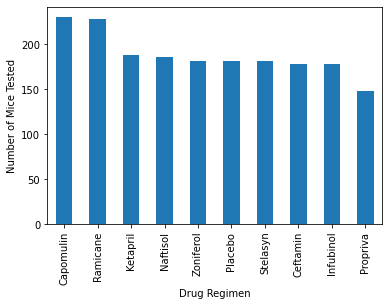

In [21]:
#generated a bar plot to show the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_and_time.sort_values(ascending=False).plot(x = '', y = '', kind = 'bar',title = '')
plt.show
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen");


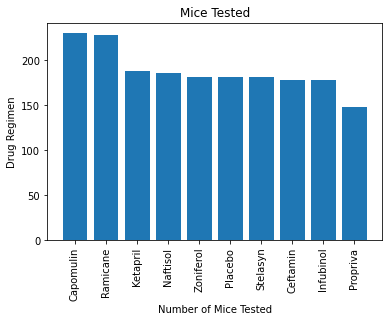

In [22]:
#generated a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(drug_and_time.sort_values(ascending=False).index,drug_and_time.sort_values(ascending=False))
plt.title("Mice Tested")
plt.xlabel("Number of Mice Tested")
plt.ylabel("Drug Regimen");
plt.xticks(rotation=90);


In [23]:
#created a new data set that took the cleaned_mice_df and grouped it by Sex
#called that data set sex_of_mice

sex_of_mice = cleaned_mice_DF.groupby(['Sex']).count()
#sex_of_mice


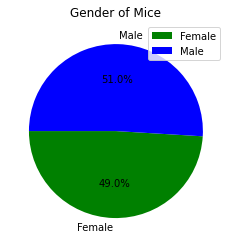

In [24]:
#generated a pie plot showing the distribution of female versus male mice using pandas

mice_sex = sex_of_mice.plot(kind = 'pie', y = 'Mouse ID', title=('Gender of Mice'),
                            colors = ['green','blue'], autopct="%1.1f%%", startangle=180)

mice_sex.set_ylabel('');


In [25]:
# created a new data set that took the cleaned_mice_DF and located the "Female" mice within the Sex columns.
#called data set female_mice_df
#used len formula to get the length of male mice.

female_mice_df = cleaned_mice_DF.loc[cleaned_mice_DF['Sex'] == 'Female']
female_mice_total = len(female_mice_df)
#female_mice_total

In [26]:
# created a new data set that took the cleaned_mice_DF and located the "male" mice within the Sex columns.
#called data set male_mice_df
#used len formula to get the length of female mice.

male_mice_df = cleaned_mice_DF.loc[cleaned_mice_DF['Sex'] == 'Male']
male_mice_total = len(male_mice_df)
#male_mice_total

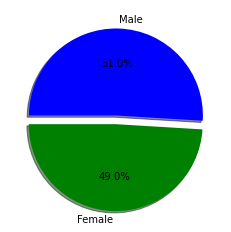

In [27]:
#generated a pie plot showing the distribution of female versus male mice using pyplot

total_mice = ["Female", "Male"] 
sex = [female_mice_total, male_mice_total] 
colors = ["green","blue"]
explode = (0.1, 0)

plt.pie(sex, explode=explode, labels = total_mice, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180);
plt.title = "Distribution: Female vs Male";


## Quartiles, Outliers and Boxplots

In [28]:
##created a new data set that took the cleaned_mice_DF.groupby and grouped it by the Mouse ID to get the max timepoint
#for the mice, called that data set max_mice

max_mice_timepoint = cleaned_mice_DF.groupby(['Mouse ID'])['Timepoint'].max()

#resetting the index to create a new index for dataset.
max_mice_timepoint = max_mice_timepoint.reset_index()


In [29]:
#merged the data from above
merged_mice_data = pd.merge(max_mice_timepoint, cleaned_mice_DF, on =['Mouse ID','Timepoint'],how='left')
#merged_mice_data.head()


In [30]:
#put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

#created an empty list to fill with tumor vol data (for plotting) called tumor_vol_list
tumor_vol_list = []

#drug_list

In [31]:
#calculated the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    #located the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_rows = merged_mice_data.loc[merged_mice_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    #added subset 
    tumor_vol_list.append(tumor_vol_rows)
    
    #dtermined the outliers using upper and lower bounds
    quartiles = tumor_vol_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_rows.loc[(tumor_vol_rows < lower_bound) | (tumor_vol_rows >upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


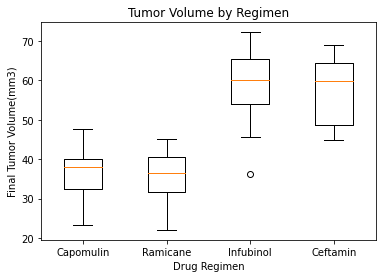

In [32]:
#generated a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_list,labels = drug_list )
plt.show()


## Line and Scatter Plots

In [33]:
#created a dataframe to locate all mice that used the Capomulin drug
capomulin = mouse_and_study_data.loc[mouse_and_study_data['Drug Regimen']=='Capomulin']
#capomulin


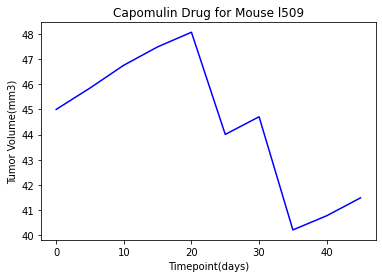

In [34]:
#created a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#located mouse l509 within capomulin dataframe
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]== 'l509']
capomulin_mouse

#created line graph
x_axis = capomulin_mouse['Timepoint']
y_axis = capomulin_mouse['Tumor Volume (mm3)']


fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Drug for Mouse l509')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.set_xlabel('Timepoint(days)')
plt.plot(x_axis, y_axis, color='blue')
plt.show()


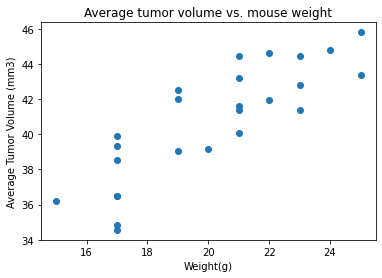

In [35]:
#used the Capomulin data frame and gruouped it by mouse ID and use the .mean formula to get the average
#called this data frame capomulin_tumor_mean

capomulin_tumor_mean = capomulin.groupby(['Mouse ID']).mean()
#capomulin_tumor_mean.head()

#created a dataset that to get the weight of the mice using the capomulin drug
capomulin_mouse_weight = capomulin_tumor_mean['Weight (g)']
#created a dataset that to get the tumor volume of the mice using the capomulin drug
capomulin_tumor_vol = capomulin_tumor_mean['Tumor Volume (mm3)']

#generated a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()

plt.scatter(capomulin_mouse_weight,capomulin_tumor_vol)
ax1.set_title('Average tumor volume vs. mouse weight')
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xlabel('Weight(g)') 

plt.show()


## Correlation and Regression

In [36]:
#calculated the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
#called that calculation correlation_coeff

correlation_coeff = round(st.pearsonr(capomulin_mouse_weight,capomulin_tumor_vol)[0],2)
#correlation_coeff
#print the correlation_coeff above the chart


In [37]:
#calculated the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_mouse_weight,capomulin_tumor_vol)

regress_value = capomulin_mouse_weight * slope + intercept
#regress_value


The correlation between mouse weight and average tumor volume is: 0.84


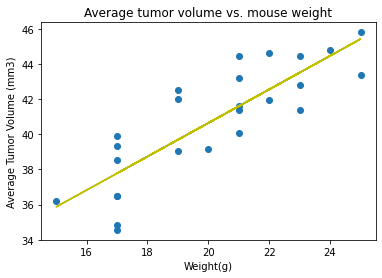

In [38]:
#generated a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

print(f"The correlation between mouse weight and average tumor volume is: {correlation_coeff}")

fig1, ax1 = plt.subplots()

plt.scatter(capomulin_mouse_weight,capomulin_tumor_vol)
plt.plot(capomulin_mouse_weight,regress_value,"y-")
ax1.set_title('Average tumor volume vs. mouse weight')
ax1.set_ylabel('Average Tumor Volume (mm3)')
ax1.set_xlabel('Weight(g)') 

plt.show()
